<a href="https://colab.research.google.com/github/younghoonNa/PythonDT2/blob/main/Day2_notepad_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install pycaret[full]

In [3]:
from sklearn.datasets import load_boston

boston  = load_boston()

In [4]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train ,y_test = train_test_split(boston.data, boston.target, random_state=1234)

In [5]:
# OLS
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [6]:
# score
model.score(x_train ,y_train)

0.7301842893511348

In [7]:
# prediction
x_test[1], y_test[1]

(array([1.4866e-01, 0.0000e+00, 8.5600e+00, 0.0000e+00, 5.2000e-01,
        6.7270e+00, 7.9900e+01, 2.7778e+00, 5.0000e+00, 3.8400e+02,
        2.0900e+01, 3.9476e+02, 9.4200e+00]),
 27.5)

In [8]:
model.predict([x_test[1]])

array([23.91795398])

In [9]:
 model.coef_

array([-9.70341820e-02,  6.31133687e-02, -1.41118921e-02,  2.84299322e+00,
       -2.18920156e+01,  2.41452999e+00,  2.39658929e-03, -1.88925109e+00,
        3.56352826e-01, -1.28011290e-02, -1.05894185e+00,  1.01171710e-02,
       -5.63174445e-01])

In [10]:
boston.data.shape

(506, 13)

In [11]:
model.intercept_

50.827958906000234

In [12]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(boston.data)

In [13]:
x_poly.shape

(506, 105)

In [14]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train ,y_test = train_test_split(x_poly, boston.target, random_state=1234)

In [15]:
# OLS
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [16]:
model.score(x_train, y_train)

0.9334102911079637

In [17]:
model.predict([x_test[1]])

array([24.43456459])

In [18]:
# 속성
max(abs(model.coef_))

269602289.6538986

In [19]:
#Ridge
from sklearn.linear_model import Ridge

model = Ridge(alpha = 1)
model.fit(x_train, y_train)

Ridge(alpha=1)

In [20]:
model.score(x_train, y_train), model.score(x_test, y_test )

(0.9265128190441482, 0.885222865125399)

In [21]:
#Ridge
model1 = Ridge(alpha = 10)
model1.fit(x_train, y_train)

Ridge(alpha=10)

In [22]:
model1.score(x_train, y_train), model1.score(x_test, y_test )

(0.9166316020698666, 0.8903141691237977)

In [23]:
#Ridge
model2 = Ridge(alpha = 100)
model2.fit(x_train, y_train)

Ridge(alpha=100)

In [24]:
model2.score(x_train, y_train), model2.score(x_test, y_test )

(0.9041629268194896, 0.8853493860023617)

In [25]:
#Ridge
model3 = Ridge(alpha = 20)
model3.fit(x_train, y_train)

Ridge(alpha=20)

In [26]:
model3.score(x_train, y_train), model3.score(x_test, y_test )

(0.9129595813457559, 0.88953539081862)

## Lasso

In [27]:
from sklearn.linear_model import Lasso

model_las = Lasso(alpha = 1)
model_las.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2150.672913984613, tolerance: 2.968881308707124
  positive)


Lasso(alpha=1)

In [28]:
model_las.score(x_train, y_train) , model_las.score(x_test, y_test)

(0.8734068549972756, 0.8657058726159836)

In [29]:
model_las2 = Lasso(alpha = 0.1)
model_las2.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1713.0584338451536, tolerance: 2.968881308707124
  positive)


Lasso(alpha=0.1)

In [30]:
model_las2.score(x_train, y_train) , model_las2.score(x_test, y_test)

(0.8972887975738117, 0.8962494854989158)

In [31]:
model_las2 = Lasso(alpha = 0.1, max_iter = 100000)
model_las2.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 110.43550562278142, tolerance: 2.968881308707124
  positive)


Lasso(alpha=0.1, max_iter=100000)

In [32]:
model_las2.score(x_train, y_train) , model_las2.score(x_test, y_test)

(0.9043401279248954, 0.8908640244182316)

In [33]:
model_las2 = Lasso(alpha = 0.1, max_iter = 1000000)
model_las2.fit(x_train, y_train)

Lasso(alpha=0.1, max_iter=1000000)

In [34]:
model_las2.score(x_train, y_train) , model_las2.score(x_test, y_test)

(0.9043228896256802, 0.8907476917391013)

## 정규화

In [35]:
# scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(boston.data)

In [36]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train ,y_test = train_test_split(x_scaled, boston.target, random_state=1234)

In [37]:
# SGD
from sklearn.linear_model import SGDRegressor

model = SGDRegressor()
model.fit(x_train, y_train)

SGDRegressor()

In [38]:
model.score(x_train ,y_train), model.score(x_test ,y_test)

(0.7289515013425603, 0.7366639566134543)

In [39]:
from sklearn.datasets import load_iris

iris  = load_iris()

<AxesSubplot:>

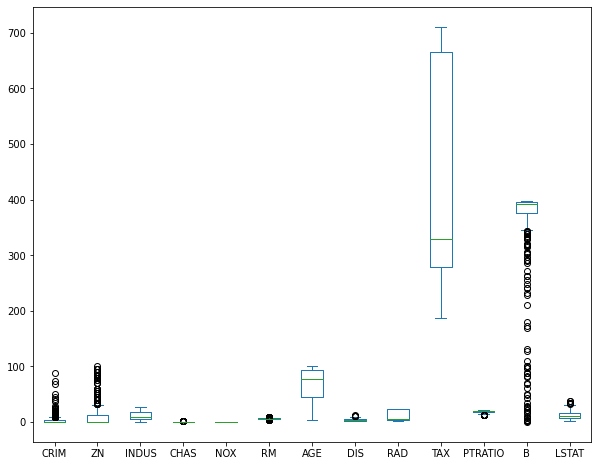

In [40]:
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df.plot.box(figsize=(10, 8))

In [41]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train ,y_test = train_test_split(iris.data, iris.target, random_state=1234, stratify=iris.target)

In [42]:
# Log
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

## Decision Tree

In [44]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state = 42)
model.fit(x_train, y_train)
model.score(x_train, y_train) , model.score(x_test, y_test)

(1.0, 0.9736842105263158)

In [45]:
model.tree_.max_depth

5

In [51]:
model.feature_importances_

array([0.03348481, 0.        , 0.9102607 , 0.05625448])

In [53]:
model = DecisionTreeClassifier(random_state=42)
model.fit(x_train[:, 2:4], y_train)
model.score(x_train[:, 2:4], y_train) , model.score(x_test[:, 2:4], y_test)

(0.9910714285714286, 0.9473684210526315)

# Boosting

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston

boston  = load_boston()
x_train, x_test, y_train ,y_test = train_test_split(boston.data, boston.target, random_state=1234)

In [72]:
from sklearn.linear_model import Ridge

model = Ridge()
model.fit(x_train, y_train)

Ridge()

In [73]:
from sklearn.tree import DecisionTreeRegressor

model2 = DecisionTreeRegressor(random_state= 42)
model2.fit(x_train ,y_train)

DecisionTreeRegressor(random_state=42)

In [74]:
pred1 = model.predict(x_test)
pred2 = model.predict(x_test)

In [77]:
pred = 0.3 * pred1 + 0.7 * pred2

In [78]:
from sklearn.metrics import r2_score 

r2_score(y_test, pred)

0.7392781080126782

# XGB LGHM

In [79]:
from xgboost import XGBRegressor

model = XGBRegressor(random_state=0)
model.fit(x_train, y_train)
model.score(x_train, y_train), model.score(x_test, y_test)

(0.9999977961022865, 0.8941188975894797)

In [80]:
from lightgbm import LGBMRegressor

model = LGBMRegressor(random_state=0)
model.fit(x_train, y_train)
model.score(x_train, y_train), model.score(x_test, y_test)

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


(0.9741685830615501, 0.9117969156453528)

In [85]:
from xgboost import XGBRegressor

eval_set = [
            (x_test , y_test)
]

model = XGBRegressor(random_state=0, n_estimators = 3000)
model.fit(x_train, y_train, eval_set=eval_set , verbose = 100, eval_metric = 'rmse', ealry_stopping_round = 500)

[0]	validation_0-rmse:17.66831
[100]	validation_0-rmse:3.29071
[200]	validation_0-rmse:3.29069
[300]	validation_0-rmse:3.29069
[400]	validation_0-rmse:3.29069
[500]	validation_0-rmse:3.29069
[600]	validation_0-rmse:3.29069
[700]	validation_0-rmse:3.29069
[800]	validation_0-rmse:3.29069
[900]	validation_0-rmse:3.29069
[1000]	validation_0-rmse:3.29069
[1100]	validation_0-rmse:3.29069
[1200]	validation_0-rmse:3.29069
[1300]	validation_0-rmse:3.29069
[1400]	validation_0-rmse:3.29069
[1500]	validation_0-rmse:3.29069
[1600]	validation_0-rmse:3.29069
[1700]	validation_0-rmse:3.29069
[1800]	validation_0-rmse:3.29069
[1900]	validation_0-rmse:3.29069
[2000]	validation_0-rmse:3.29069
[2100]	validation_0-rmse:3.29069
[2200]	validation_0-rmse:3.29069
[2300]	validation_0-rmse:3.29069
[2400]	validation_0-rmse:3.29069
[2500]	validation_0-rmse:3.29069
[2600]	validation_0-rmse:3.29069
[2700]	validation_0-rmse:3.29069
[2800]	validation_0-rmse:3.29069
[2900]	validation_0-rmse:3.29069
[2999]	validation_0-r

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=3000, n_jobs=2,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [88]:
from lightgbm import LGBMRegressor

eval_set = [
            (x_test , y_test)
]

model = LGBMRegressor(random_state=0, n_estimators = 3000)
model.fit(x_train, y_train, eval_set=eval_set , verbose = 100, eval_metric = 'rmse')

/usr/local/lib/python3.7/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[100]	valid_0's rmse: 3.00333	valid_0's l2: 9.02001
[200]	valid_0's rmse: 2.93887	valid_0's l2: 8.63695
[300]	valid_0's rmse: 2.94283	valid_0's l2: 8.66027
[400]	valid_0's rmse: 2.94868	valid_0's l2: 8.69469
[500]	valid_0's rmse: 2.96094	valid_0's l2: 8.76714
[600]	valid_0's rmse: 2.96793	valid_0's l2: 8.80863
[700]	valid_0's rmse: 2.9741	valid_0's l2: 8.84525
[800]	valid_0's rmse: 2.97752	valid_0's l2: 8.86562
[900]	valid_0's rmse: 2.97981	valid_0's l2: 8.87929
[1000]	valid_0's rmse: 2.98259	valid_0's l2: 8.89582
[1100]	valid_0's rmse: 2.9841	valid_0's l2: 8.90482
[1200]	valid_0's rmse: 2.98491	valid_0's l2: 8.90966
[1300]	valid_0's rmse: 2.98588	valid_0's l2: 8.91545
[1400]	valid_0's rmse: 2.98668	valid_0's l2: 8.92023
[1500]	valid_0's rmse: 2.98745	valid_0's l2: 8.92483
[1600]	valid_0's rmse: 2.98833	valid_0's l2: 8.93012
[1700]	valid_0's rmse: 2.98927	valid_0's l2: 8.93571
[1800]	valid_0's rmse: 2.99076	valid_0's l2: 8.94465
[1900]	valid_0's rmse: 2.99177	valid_0's l2: 8.95071
[200

LGBMRegressor(n_estimators=3000, random_state=0)